# Kaggle - Tabular Playground Series - Jan 2022

# 1. Modulos

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
#paths de los datos correspondiente al repositosio

train_path = 'https://raw.githubusercontent.com/ccollado7/kaggle-tps-jan2022/main/data/raw/train.csv'
test_path = 'https://raw.githubusercontent.com/ccollado7/kaggle-tps-jan2022/main/data/raw/test.csv'

In [3]:
#dataset de train

train = pd.read_csv(train_path)
train.head()

,row_id,date,country,store,product,num_sold
0,0,2015-01-01,Finland,KaggleMart,Kaggle Mug,329
1,1,2015-01-01,Finland,KaggleMart,Kaggle Hat,520
2,2,2015-01-01,Finland,KaggleMart,Kaggle Sticker,146
3,3,2015-01-01,Finland,KaggleRama,Kaggle Mug,572
4,4,2015-01-01,Finland,KaggleRama,Kaggle Hat,911


In [4]:
train.dtypes

row_id       int64
date        object
country     object
store       object
product     object
num_sold     int64
dtype: object

Para poder realizar analisis por año y por meses incorporo columnas con estos valores

In [52]:
train['year'] = pd.to_datetime(train['date']).dt.year
train['month'] = pd.to_datetime(train['date']).dt.month
train['week'] = pd.to_datetime(train['date']).dt.week
train['day'] = pd.to_datetime(train['date']).dt.day

train.sample(10)

,row_id,date,country,store,product,num_sold,year,month,day,week
14565,14565,2017-03-20,Finland,KaggleRama,Kaggle Mug,300,2017,3,20,12
10823,10823,2016-08-24,Finland,KaggleRama,Kaggle Sticker,153,2016,8,24,34
3285,3285,2015-07-02,Norway,KaggleRama,Kaggle Mug,391,2015,7,2,27
8755,8755,2016-05-01,Norway,KaggleMart,Kaggle Hat,701,2016,5,1,17
15235,15235,2017-04-26,Norway,KaggleMart,Kaggle Hat,613,2017,4,26,17
7074,7074,2016-01-29,Finland,KaggleMart,Kaggle Mug,197,2016,1,29,4
788,788,2015-02-13,Sweden,KaggleMart,Kaggle Sticker,100,2015,2,13,7
4275,4275,2015-08-26,Norway,KaggleRama,Kaggle Mug,490,2015,8,26,35
22757,22757,2018-06-18,Finland,KaggleRama,Kaggle Sticker,207,2018,6,18,25
5541,5541,2015-11-04,Sweden,KaggleRama,Kaggle Mug,399,2015,11,4,45


In [6]:
#dataset de test

test = pd.read_csv(test_path)
test.head()

,row_id,date,country,store,product
0,26298,2019-01-01,Finland,KaggleMart,Kaggle Mug
1,26299,2019-01-01,Finland,KaggleMart,Kaggle Hat
2,26300,2019-01-01,Finland,KaggleMart,Kaggle Sticker
3,26301,2019-01-01,Finland,KaggleRama,Kaggle Mug
4,26302,2019-01-01,Finland,KaggleRama,Kaggle Hat


# 2. Analisis Train

## 2.1 Analisis General

Text(0.5, 1.0, 'Registros por Pais')

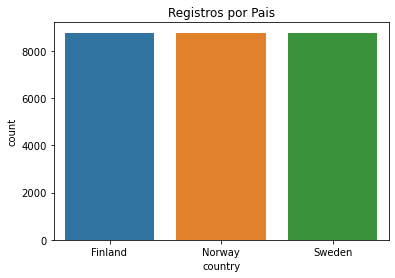

In [7]:
#Cantidad de registros por pais

sns.countplot(x="country", data=train).set_title('Registros por Pais')

Text(0.5, 1.0, 'Registros por Tienda')

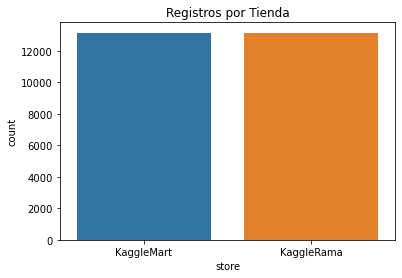

In [8]:
#Cantidad de registros por tienda

sns.countplot(x="store", data=train).set_title('Registros por Tienda')

Text(0.5, 1.0, 'Registros por Producto')

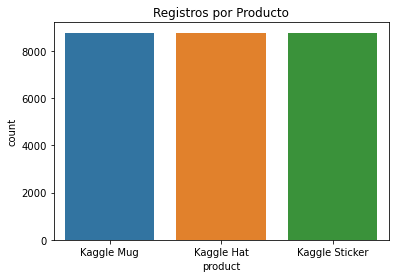

In [9]:
#Cantidad de registros por producto

sns.countplot(x="product", data=train).set_title('Registros por Producto')

Text(0.5, 1.0, 'KDE de ventas por Pais')

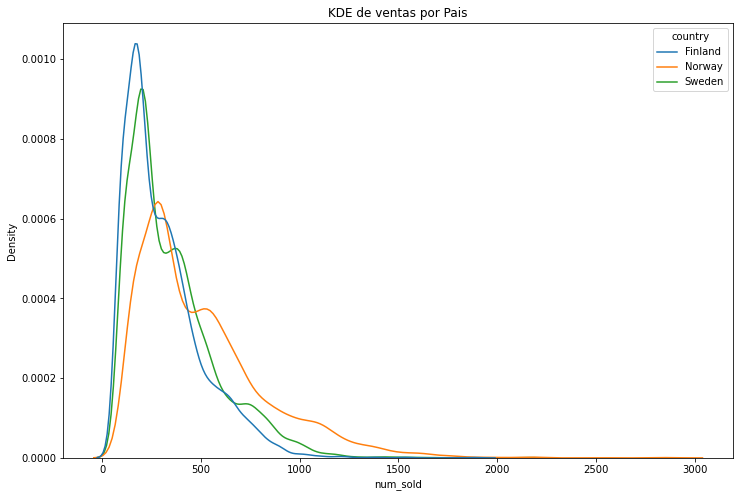

In [29]:
#distribucion de numero de ventas en funcion del pais

plt.figure(figsize=(12,8))
sns.kdeplot(data=train, x="num_sold", hue="country").set_title('KDE de ventas por Pais')

Text(0.5, 1.0, 'Boxplot - Ventas por Pais')

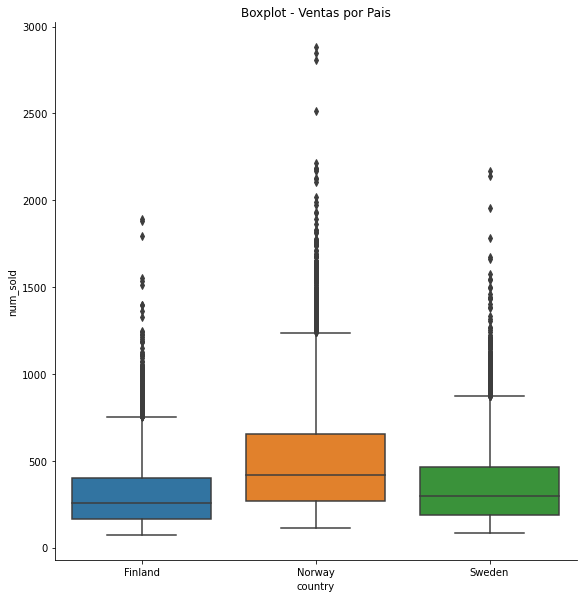

In [31]:
#Cantidad vendida por pais

sns.catplot(x="country", y="num_sold", kind="box", data=train,height=8, aspect=1)
plt.title('Boxplot - Ventas por Pais')

Text(0.5, 1.0, 'Boxplot - Ventas por Pais y año')

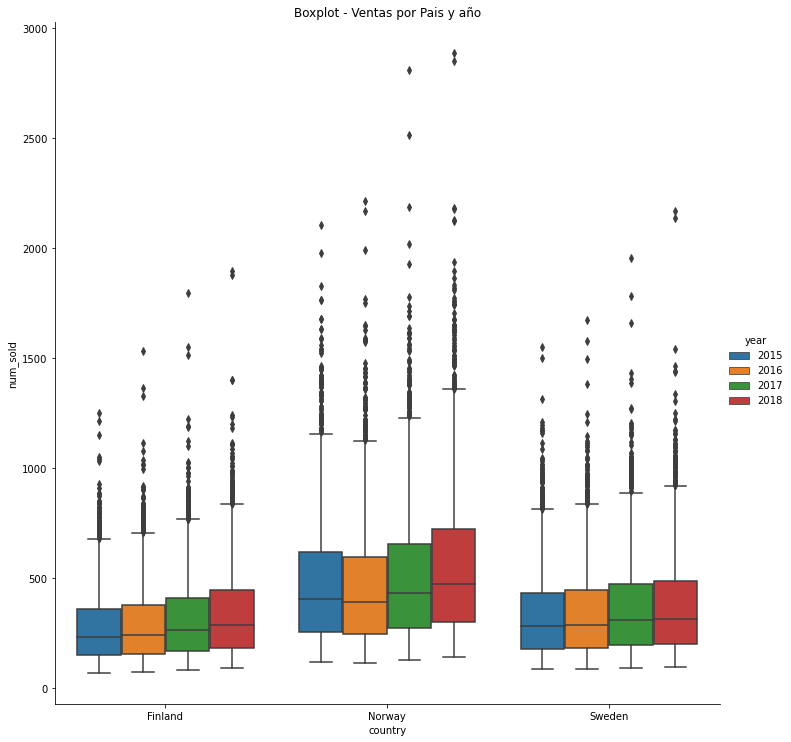

In [32]:
#Cantidad vendida por pais y por año

sns.catplot(x="country", y="num_sold", hue="year", kind="box", data=train,height=10, aspect=1)
plt.title('Boxplot - Ventas por Pais y año')

Text(0.5, 1.0, 'Boxplot - Ventas por Pais y tipo de tienda')

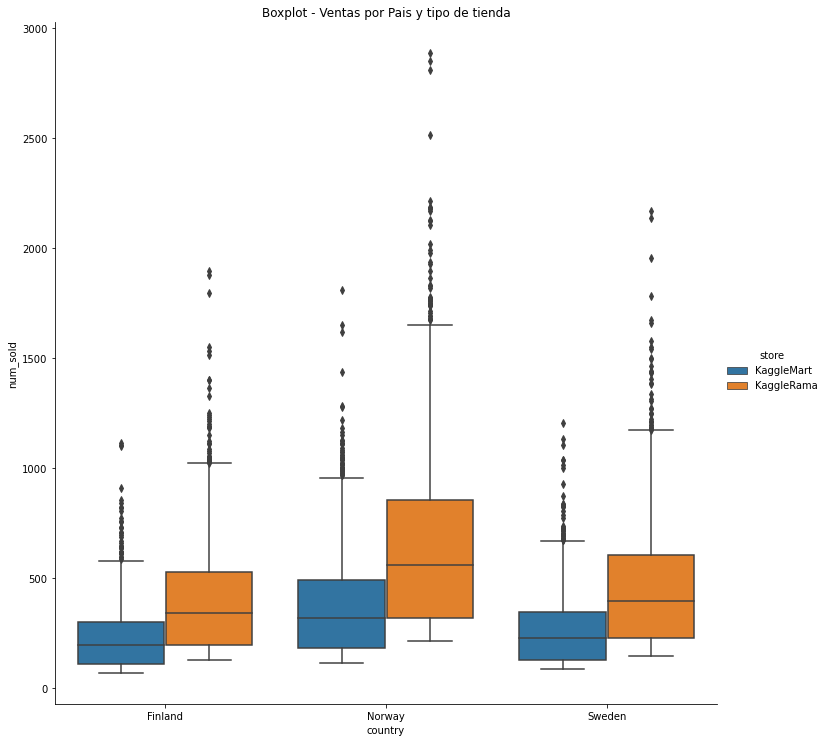

In [33]:
#Cantidad vendida por pais y por tienda

sns.catplot(x="country", y="num_sold", hue="store", kind="box", data=train,height=10, aspect=1)
plt.title('Boxplot - Ventas por Pais y tipo de tienda')

Text(0.5, 1.0, 'Boxplot - Ventas por tienda y por año')

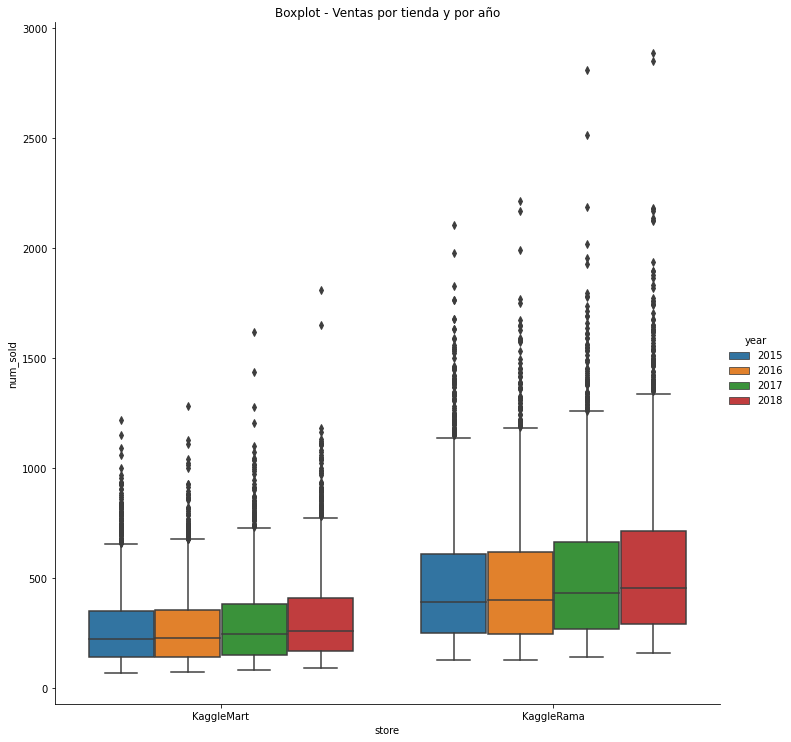

In [34]:
#Cantidad vendida por tienda y por año

sns.catplot(x="store", y="num_sold", hue="year", kind="box", data=train,height=10, aspect=1)
plt.title('Boxplot - Ventas por tienda y por año')

Text(0.5, 1.0, 'Boxplot - Ventas por Pais y tipo de producto')

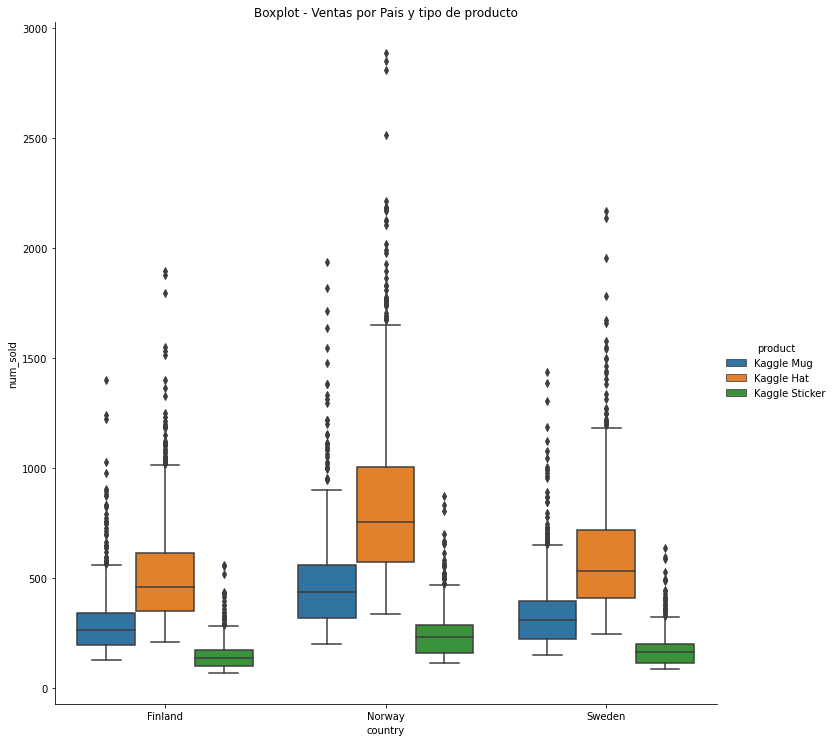

In [35]:
#Cantidad vendida por pais y por producto

sns.catplot(x="country", y="num_sold", hue="product", kind="box", data=train,height=10, aspect=1)
plt.title('Boxplot - Ventas por Pais y tipo de producto')

Text(0.5, 1.0, 'Boxplot - Ventas por producto y por año')

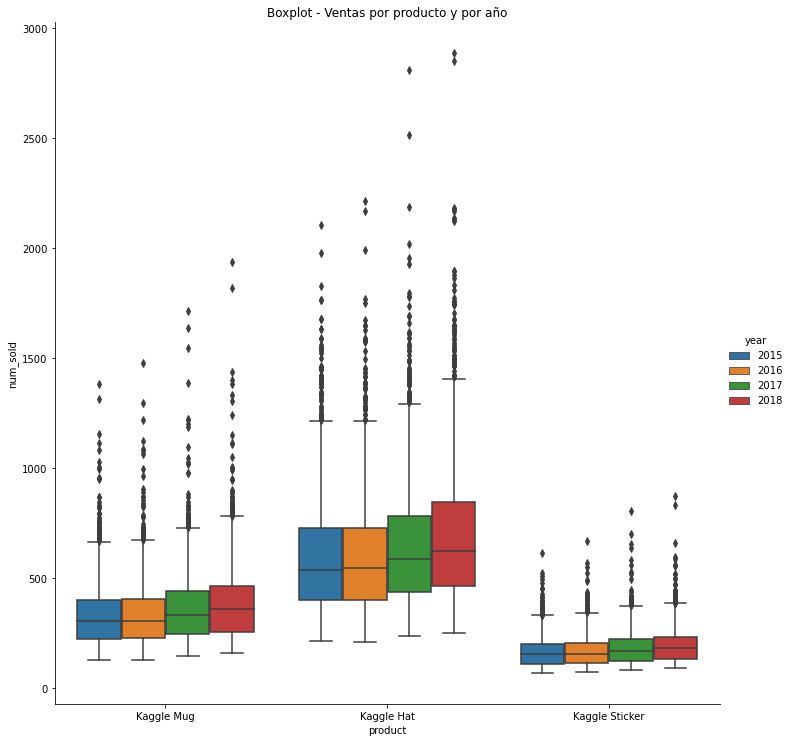

In [36]:
#Cantidad vendida por producto y por año

sns.catplot(x="product", y="num_sold", hue="year", kind="box", data=train,height=10, aspect=1)
plt.title('Boxplot - Ventas por producto y por año')

Text(0.5, 1.0, 'Boxplot - Ventas por tienda y tipo de producto')

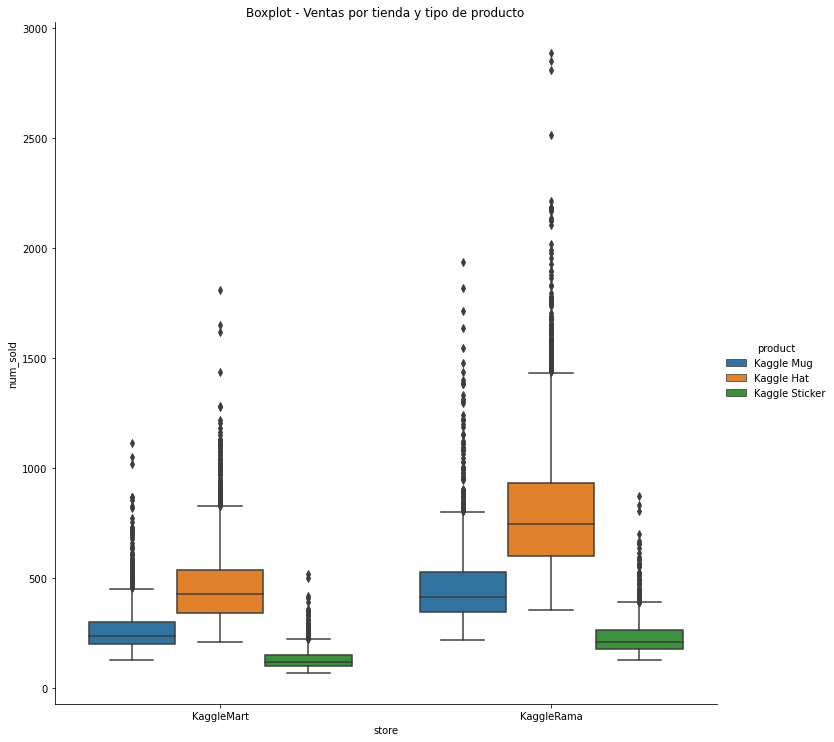

In [37]:
#Cantidad vendida por tienda y por producto

sns.catplot(x="store", y="num_sold", hue="product", kind="box", data=train,height=10, aspect=1)
plt.title('Boxplot - Ventas por tienda y tipo de producto')

## 2.2  Analisis Finlandia

In [18]:
filt = 'Finland'

train_finland = train[train['country'] == filt]
train_finland.head()

,row_id,date,country,store,product,num_sold,year,month,day
0,0,2015-01-01,Finland,KaggleMart,Kaggle Mug,329,2015,1,1
1,1,2015-01-01,Finland,KaggleMart,Kaggle Hat,520,2015,1,1
2,2,2015-01-01,Finland,KaggleMart,Kaggle Sticker,146,2015,1,1
3,3,2015-01-01,Finland,KaggleRama,Kaggle Mug,572,2015,1,1
4,4,2015-01-01,Finland,KaggleRama,Kaggle Hat,911,2015,1,1


Text(0.5, 1.0, 'Title')

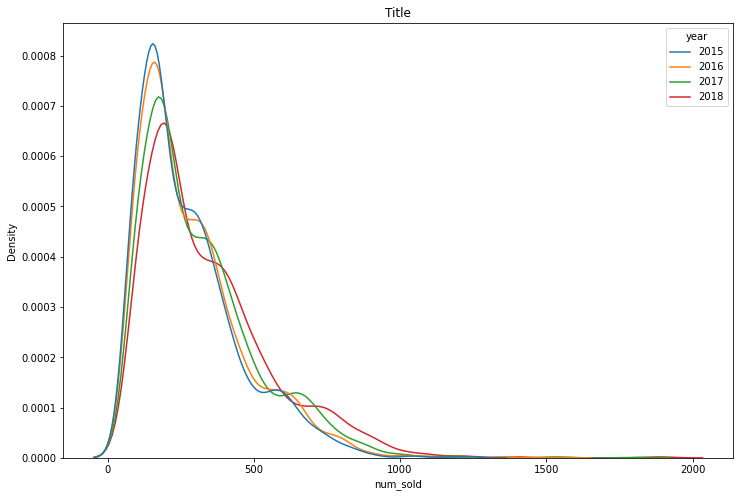

In [30]:
#distribucion de numero de ventas en funcion del pais

plt.figure(figsize=(12,8))
sns.kdeplot(data=train_finland, x="num_sold", hue="year",palette="tab10").set_title('Title')

Text(0.5, 1.0, 'Boxplot - Ventas por Mes - Finlandia')

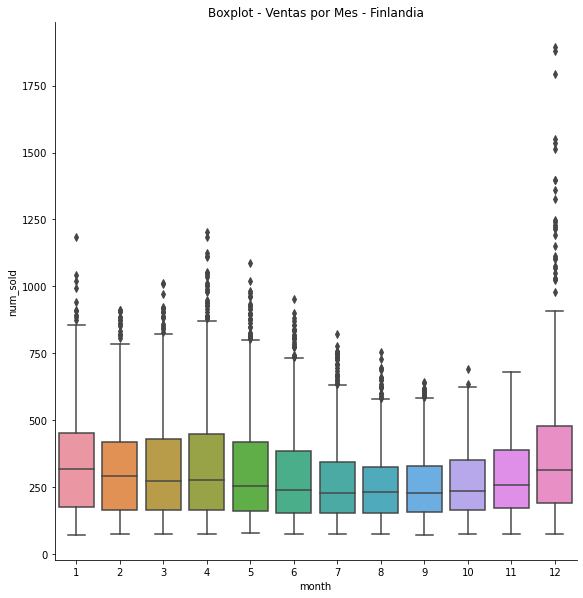

In [24]:
#Cantidad vendida por mes

sns.catplot(x="month", y="num_sold", kind="box", data=train_finland,height=8,aspect=1)
plt.title('Boxplot - Ventas por Mes - Finlandia')

Text(0.5, 1.0, 'Boxplot - Ventas por Mes - Finlandia')

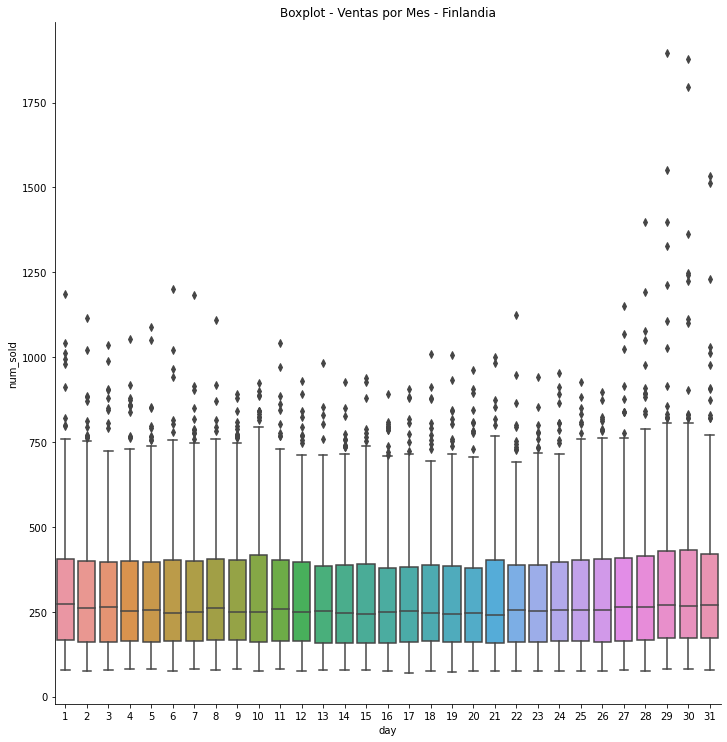

In [21]:
#Cantidad vendida por mes
sns.catplot(x="day", y="num_sold", kind="box", data=train_finland,height=10, aspect=1)
plt.title('Boxplot - Ventas por Mes - Finlandia')